<img src="black-friday.jpg" height="12px">

# Análise e Previsão de vendas da Black Friday

Este conjunto de dados é composto por transações de vendas capturadas em uma loja de varejo. É um conjunto de dados clássico para explorar e expandir as habilidades de engenharia de recursos e compreensão do dia a dia de várias experiências de compra. O conjunto de dados possui 550.069 linhas e 12 colunas. O projeto consiste na análise e a aplicação de algoritmos de machine learning de regressão ponta a ponta baseado no capítulo 2 do livro 'Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow' de Aurélien Géron.

This dataset comprises of sales transactions captured at a retail store. It is a classic data set for exploring and expanding the resource engineering skills and day-to-day understanding of various shopping experiences. The dataset has 550,069 rows and 12 columns. The project consists of analyzing and applying end-to-end regression machine learning algorithms based on chapter 2 of the book 'Hands on Work: Machine Learning with Scikit-Learn & TensorFlow' by Aurélien Géron.

Link original: https://datahack.analyticsvidhya.com/contest/black-friday/

**Objetivo**: Determinar qual o melhor modelo de regressão para este problema.



**Problem**: Determine the best regression model for this problem.

## Obtendo os dados

#### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Daniel-RPS/Black-Friday-Dataset-Analysis-Predictions/main/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.columns #Colunas

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### Dicionário de dados

* `User_ID`: Unique ID of the user. There are a total of 5891 users in the dataset.
* `Product_ID`: Unique ID of the product. There are a total of 3623 products in the dataset.
* `Gender`: indicates the gender of the person making the transaction.
* `Age`: indicates the age group of the person making the transaction.
* `Occupation`: shows the occupation of the user, already labeled with numbers 0 to 20.
* `City_Category`: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
* `Stay_In_Current_City_Years`: Indicates how long the users has lived in this city.
* `Marital_Status`: is 0 if the user is not married and 1 otherwise.
* `Product_Category_1 to _3`: Category of the product. All 3 are already labaled with numbers.
* `Purchase`: Purchase amount.

In [4]:
df.shape #linhas e colunas.

(537577, 12)

In [5]:
df.info() #descrição dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.describe() #sumário de atributos numéricos

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
df.describe(include='O') #descrição estatística das variáveis catgóricas

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


In [8]:
#Valores nulos no dataset
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
# Transformando os valores nulos na média de cada atributo
import math
med_cat2 = df['Product_Category_2'].mean()
med_cat3 = df['Product_Category_3'].mean()

med_cat2 = math.floor(med_cat2)
med_cat3 = math.floor(med_cat3)

df['Product_Category_2'].fillna(med_cat2, inplace=True)
df['Product_Category_3'].fillna(med_cat3, inplace=True)

### Retirando todos os valores não numéricos
#### 'Stay_In_Current_City_Years' pode ser um valor numérico. O sinal de '+' pode ser retirado e o atributo ser tranformado em numérico

In [10]:
#Retiando o sinal de '+'
df['Stay_In_Current_City_Years'] = [x[:1] for x in df['Stay_In_Current_City_Years']]

#Transformando a coluna 'Stay_In_Current_City_Years' em int64
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(np.int64)

In [11]:
#Valores nulos no dataset
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

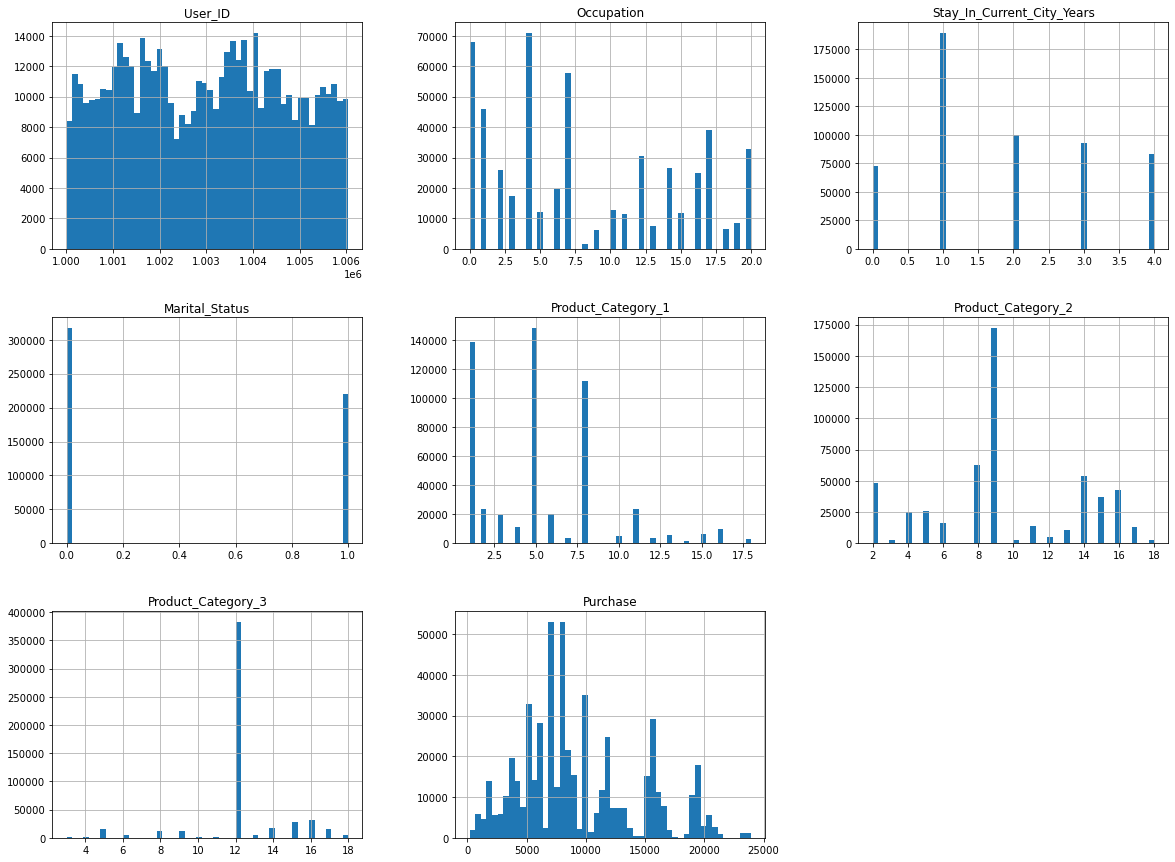

In [12]:
df.hist(bins=50,figsize=(20,15))#histograma
plt.show()

## Criando Conjunto de Testes

#### Escolher o modelo adequado

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
test_set.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
287383,1002194,P00191442,M,26-35,17,C,3,0,1,2.0,15.0,8058
130087,1001983,P00147942,M,26-35,14,A,3,0,1,16.0,12.0,19297
104368,1004064,P00035642,M,46-50,0,A,1,1,8,9.0,12.0,6121
370791,1003140,P00212842,F,26-35,4,C,1,0,8,16.0,12.0,8130
121991,1000864,P00083842,F,26-35,0,B,3,0,5,14.0,12.0,8676


#### Qual atributo é o mais importante para estimar o valor da compra?

#### De acordo com a tabela de correlações, é o Product_Category_1. Portanto, será feita uma amostragem estratificada deste atributo

In [15]:
corr_matrix = df.corr()
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_3            0.029129
Occupation                    0.021104
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Product_Category_2           -0.160510
Product_Category_1           -0.314125
Name: Purchase, dtype: float64

#### Criando um atributo na categoria Product_Category_1

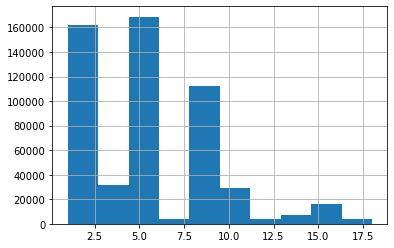

In [16]:
df["Product_Category_1"].hist();

In [17]:
df["pc1_cat"] = pd.cut(df["Product_Category_1"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
#Transformando 'pc1_cat' em float.
df['pc1_cat'] = df['pc1_cat'].astype(float)
# Em seguida, os valores nulos foram transformados na média de cada atributo
med_pc1 = df['pc1_cat'].mean()
med_pc1 = math.floor(med_pc1)
df['pc1_cat'].fillna(med_pc1, inplace=True)

In [19]:
df["pc1_cat"].value_counts()

5.0    175553
4.0    168756
1.0    138353
2.0     43348
3.0     11567
Name: pc1_cat, dtype: int64

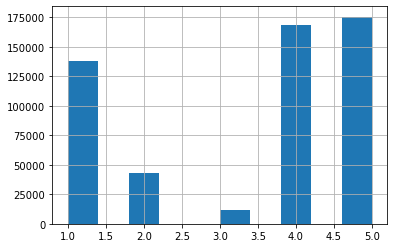

In [20]:
df["pc1_cat"].hist();

#### Mostragem estratificada com base nos Produtos de Categoria 1

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["pc1_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [22]:
#Análise das proporções de Produtos de Categoria 1 no conjunto de testes
strat_test_set["pc1_cat"].value_counts() / len(strat_test_set)

5.0    0.326565
4.0    0.313916
1.0    0.257366
2.0    0.080639
3.0    0.021513
Name: pc1_cat, dtype: float64

In [23]:
#Análise das proporções de Produtos de Categoria 1 no conjunto completo de dados
df["pc1_cat"].value_counts() / len(df)

5.0    0.326563
4.0    0.313920
1.0    0.257364
2.0    0.080636
3.0    0.021517
Name: pc1_cat, dtype: float64

In [24]:
def income_cat_proportions(data):
    return data["pc1_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

#### Comparação de viés de amostragem estratificada versus mostragem aleatória

In [25]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.257364,0.257366,0.257869,0.196039,0.000888
2.0,0.080636,0.080639,0.080574,-0.076686,0.004056
3.0,0.021517,0.021513,0.021662,0.673770,-0.017849
4.0,0.313920,0.313916,0.312335,-0.504834,-0.001151
5.0,0.326563,0.326565,0.327561,0.305331,0.000581


#### O conjunto de testes gerado com a amostragem estratificada tem proporções da categoria Product_Category_1 quase idênticas as do conjunto completo de dados. Já o conjunto de testes gerado com amostragem aleatória é um pouco distorcido.

In [26]:
#Removendo o atributo Product_Category_1 para que os dados voltem ao seu estado original
for set_ in (strat_train_set, strat_test_set):
    set_.drop("pc1_cat", axis=1, inplace=True)

In [27]:
#Criando uma cópia para treinar com ela sem prejudicar o conjunto de treinamento
df = strat_train_set.copy()

## Explorando os dados

#### Bucando correlações

In [28]:
corr_matrix = df.corr()
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_3            0.028896
Occupation                    0.021536
User_ID                       0.006270
Stay_In_Current_City_Years    0.005260
Marital_Status                0.001063
Product_Category_2           -0.159813
Product_Category_1           -0.314170
Name: Purchase, dtype: float64

In [29]:
#Combinações de atributos
df['occupation_pc1'] = df['Occupation']/df['Product_Category_1']
df['occupation_pc3'] = df['Occupation']/df['Product_Category_3']
df['marital_pc1'] = df['Marital_Status']/df['Product_Category_1']

In [30]:
corr_matrix = df.corr()
corr_matrix['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
occupation_pc1                0.343994
marital_pc1                   0.249537
occupation_pc3                0.044503
Product_Category_3            0.028896
Occupation                    0.021536
User_ID                       0.006270
Stay_In_Current_City_Years    0.005260
Marital_Status                0.001063
Product_Category_2           -0.159813
Product_Category_1           -0.314170
Name: Purchase, dtype: float64

#### Há algumas correlações interessantes entre Occupation e Product_Category_1 e 3 que poderiam ser exploradas, assim como Marital_Status e  Product_Category_1. Purchase também poderia ser explorada em comparação com as categorias de produto (1, 2 e 3) e também com a Occupation

In [31]:
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,occupation_pc1,occupation_pc3,marital_pc1
count,4.300610e+05,430061.000000,430061.000000,430061.000000,430061.000000,430061.000000,430061.000000,430061.000000,430061.000000,430061.000000,430061.000000
mean,1.002992e+06,8.084365,1.858757,0.408691,5.296463,9.583264,12.205501,9335.066730,3.231113,0.698990,0.158342
std,1.714880e+03,6.528041,1.289434,0.491593,3.752623,4.239932,2.301053,4981.501174,4.628210,0.631700,0.300851
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000,0.000000,0.000000,0.000000
25%,1.001496e+06,2.000000,1.000000,0.000000,1.000000,8.000000,12.000000,5867.000000,0.400000,0.166667,0.000000
50%,1.003031e+06,7.000000,2.000000,0.000000,5.000000,9.000000,12.000000,8061.000000,1.400000,0.583333,0.000000
75%,1.004418e+06,14.000000,3.000000,1.000000,8.000000,14.000000,12.000000,12074.000000,3.500000,1.166667,0.200000
max,1.006040e+06,20.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000,20.000000,6.666667,1.000000


# Explorando algumas hipóteses

## 1 - Qual o público que mais consome durante a Black Friday?

#### O principal público consumidor na Black Friday são as pessoas 26 a 35 anos de idade.

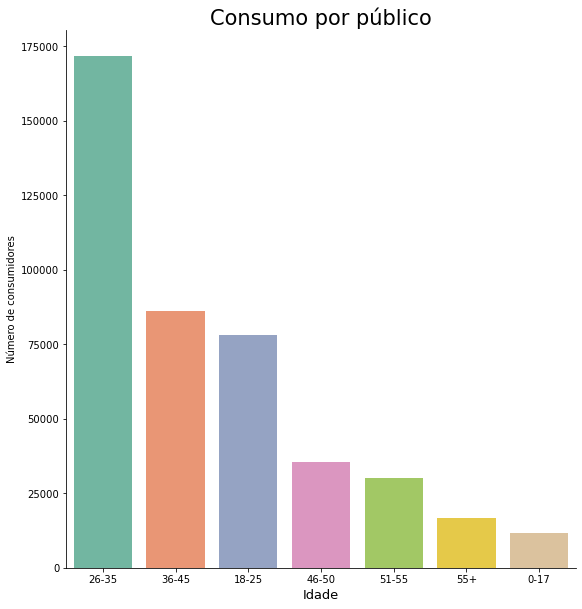

In [32]:
index = df['Age'].value_counts().index #Ordenar as colunas do maior para o menor
sns.catplot(x='Age', kind="count",palette="Set2", size = 8,order = index, data=df)
plt.xlabel('Idade', fontsize=13)
plt.ylabel('Número de consumidores')
plt.title('Consumo por público',fontsize=21);

## 2 - Os casados consomem mais na Black Friday em relação aos não-casados.
#### Falso. Os não-casados consomem mais produtos da Black Friday em relação aos casados.

<Figure size 864x360 with 0 Axes>

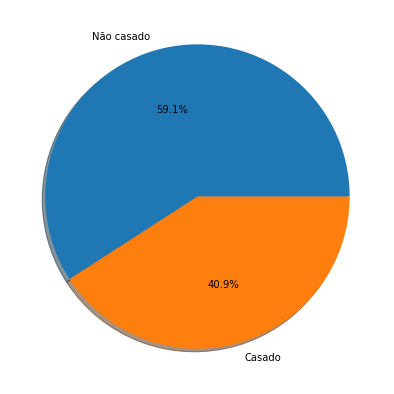

In [130]:
plt.figure(figsize=(12,5))
ms = df['Marital_Status'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(ms, labels=['Não casado', 'Casado'], autopct='%1.1f%%', shadow=True);

## 3 - Quem gasta mais em média na Black Friday, homens ou mulheres?
#### No dataset, os homens gastam mais que as mulheres, em média, na Black Friday.

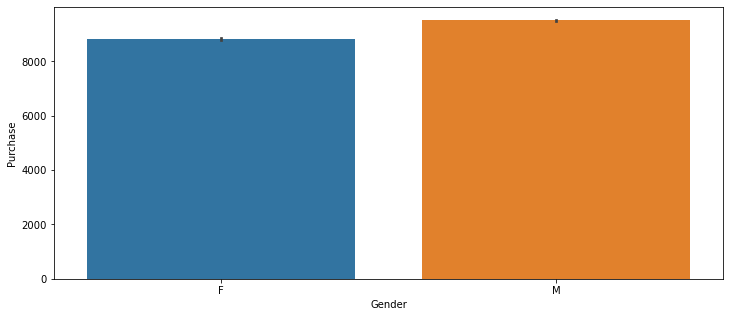

In [34]:
plt.figure(figsize=(12,5))
df[['Gender','Purchase']].groupby('Gender').mean().reset_index()
sns.barplot(x='Gender', y='Purchase',data=df);

## 4 - Média dos compradores na Black Friday por gênero

#### Os que mais consomem são homens entre 26-35 anos. Os menores de idade (0-17 anos) são os que menos consomem na Black Friday.

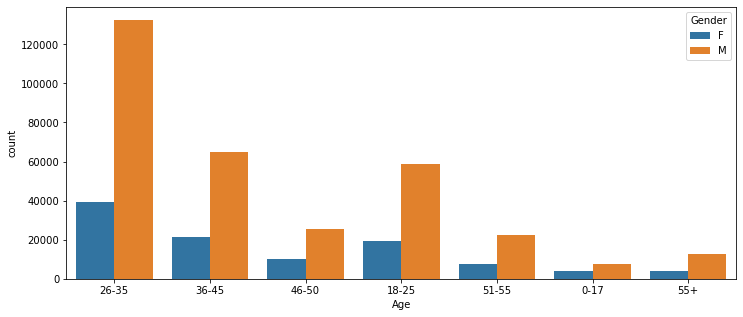

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(df['Age'],hue=df['Gender'])
plt.show();

## 5 - Homens de cidades de categoria A são os que mais consomem na Black Friday?

#### Falso. Homens de cidades de categoria B são os que mais aparecem no dataset. Mulheres de cidades de categoria A são as que menos aparecem.

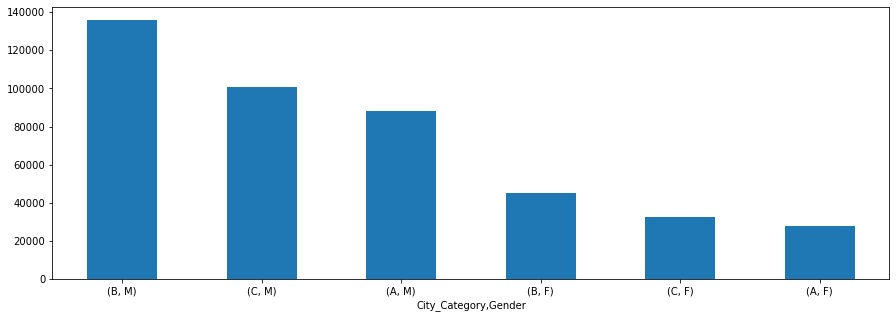

In [36]:
df[['City_Category','Gender']].value_counts().sort_values(ascending=False).plot.bar(stacked=True, figsize=(15,5))
plt.xticks(rotation = 0);

## 6 - Média de preços de Product_Category_1

#### Este atributo tem forte correlação com Purchase

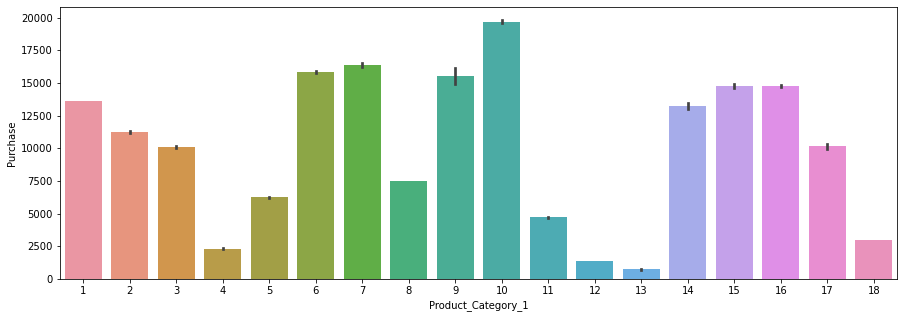

In [37]:
plt.figure(figsize=(15,5))

sns.barplot(x='Product_Category_1', y='Purchase',data=df)

plt.show();

## 7 - Presença de produtos consumidos por categoria no dataset

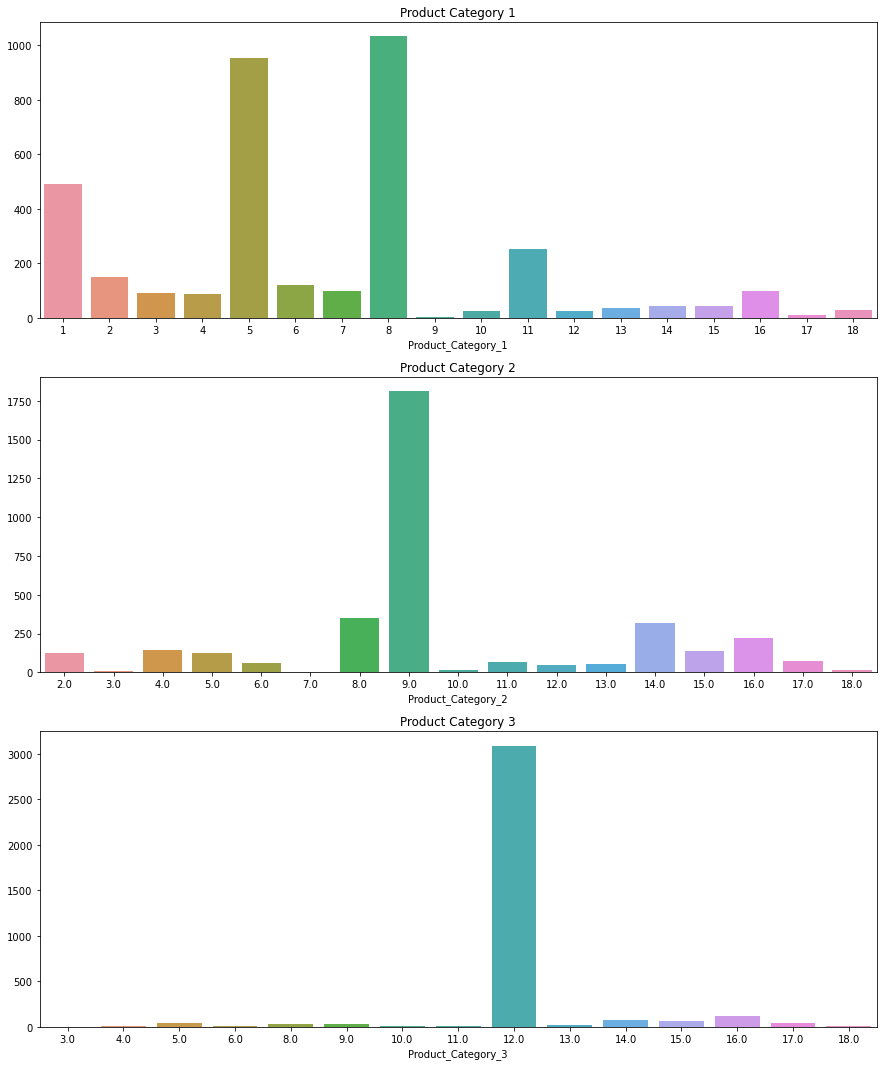

In [38]:
plt.figure(figsize=(15,25))

prod_cat1 = df.groupby('Product_Category_1')['Product_ID'].nunique()
prod_cat2 = df.groupby('Product_Category_2')['Product_ID'].nunique()
prod_cat3 = df.groupby('Product_Category_3')['Product_ID'].nunique()

plt.subplot(4, 1, 1)
sns.barplot(x=prod_cat1.index,y=prod_cat1.values)
plt.title('Product Category 1')

plt.subplot(4, 1, 2)
sns.barplot(x=prod_cat2.index,y=prod_cat2.values)
plt.title('Product Category 2')

plt.subplot(4, 1, 3)
sns.barplot(x=prod_cat3.index,y=prod_cat3.values)
plt.title('Product Category 3')


plt.show()

## Prepare the data for Machine Learning algorithms

In [39]:
#Reverter para um conjunto de treinamento limpo e criar uma cópia de dados

df = strat_train_set.drop("Purchase", axis=1) # drop labels for training set
df_labels = strat_train_set["Purchase"].copy()

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [41]:
df_num = df.drop(['User_ID','Product_ID','Age','Gender','City_Category'], axis=1)

In [42]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [43]:
imputer.statistics_

array([ 7.,  2.,  0.,  5.,  9., 12.])

In [44]:
#Transformando o conjunto de treinamento:
X = imputer.transform(df_num)

### Manipulando textos e atributos categóricos

#### Aqui, serão manipulados os atributos 'Gender' e 'City_Category'

In [45]:
df_cat = df[['Gender','City_Category']]
df_cat.head(10)

,Gender,City_Category
401558,F,B
227040,M,A
36849,M,C
185018,M,A
439479,M,B
470623,F,A
274606,M,A
273361,M,C
221455,M,C
516503,M,A


In [46]:
from sklearn.preprocessing import OrdinalEncoder

* O que será feito? A maioria dos algoritmos de ML prefere trabalhar com números, então essas categorias serão convertidas de texto para números, utilizando o método OrdinalEncoder().

* No atributo Gender, M poderá ser 0 e F poderá ser 1. No atributo City_Category, A poderá ser 0, B poderá ser 1, e assim por diante.

In [47]:
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[0., 1.],
       [1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 2.],
       [1., 2.],
       [1., 0.]])

In [48]:
ordinal_encoder.categories_

[array(['F', 'M'], dtype=object), array(['A', 'B', 'C'], dtype=object)]

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<430061x5 sparse matrix of type '<class 'numpy.float64'>'
	with 860122 stored elements in Compressed Sparse Row format>

In [51]:
df_cat_1hot.toarray()

array([[1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.]])

In [52]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object), array(['A', 'B', 'C'], dtype=object)]

In [53]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

### Customizando Transformadores

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

In [55]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
occupation_ix, city_years_ix, marital_ix, pc1_ix, pc2_ix, pc3_ix  = [
    list(df.columns).index(col)
    for col in ("Occupation", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", 
                "Product_Category_2", "Product_Category_3")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_city_years_per_pc1 = True): # no *args or **kwargs
        self.add_city_years_per_pc1 = add_city_years_per_pc1
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        marital_per_pc1_ix = X[:, marital_ix] / X[:, pc1_ix]
        occupation_per_pc1_ix = X[:, occupation_ix] / X[:, pc1_ix]
        if self.add_city_years_per_pc1:
            city_years_per_pc1 = X[:, city_years_ix] / X[:, pc1_ix]
            return np.c_[X, marital_per_pc1_ix, occupation_per_pc1_ix,
                         city_years_per_pc1]
        else:
            return np.c_[X, marital_per_pc1_ix, occupation_per_pc1_ix]

attr_adder = CombinedAttributesAdder(add_city_years_per_pc1=False)
df_extra_attribs = attr_adder.transform(df.values)

In [56]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_city_years_per_pc1 = True):
    marital_per_pc1_ix = X[:, marital_ix] / X[:, pc1_ix]
    occupation_per_pc1_ix = X[:, occupation_ix] / X[:, pc1_ix]
    if add_city_years_per_pc1:
        city_years_per_pc1 = X[:, city_years_ix] / X[:, pc1_ix]
        return np.c_[X, marital_per_pc1_ix, occupation_per_pc1_ix, city_years_per_pc1]
    else:
            return np.c_[X, marital_per_pc1_ix, occupation_per_pc1_ix]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_city_years_per_pc1": False})

df_extra_attribs = attr_adder.fit_transform(df.values)

In [57]:
df_extra_attribs = pd.DataFrame(
    df_extra_attribs,
    columns=list(df.columns)+["marital_per_pc1_ix", "occupation_per_pc1_ix"],
    index=df.index)
df_extra_attribs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,marital_per_pc1_ix,occupation_per_pc1_ix
401558,1001756,P00224142,F,26-35,1,B,2,1,8,9.0,12.0,0.125,0.125
227040,1004984,P00303742,M,36-45,0,A,1,1,8,9.0,12.0,0.125,0.0
36849,1005676,P00015142,M,26-35,20,C,0,0,5,9.0,12.0,0.0,4.0
185018,1004510,P00114342,M,46-50,7,A,4,1,1,8.0,17.0,1.0,7.0
439479,1001639,P00015542,M,26-35,17,B,1,0,1,2.0,13.0,0.0,17.0


### Pipelines de Transformação

* Será construído um pipeline para pré-processar os atributos numéricos.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer()),
        ('std_scaler', StandardScaler()),
    ])

In [60]:
df_num_tr = num_pipeline.fit_transform(df_num)

In [61]:
df_num_tr

array([[-1.08522187,  0.10953866,  1.20284546,  0.72044017, -0.13756457,
        -0.08930753],
       [-1.23840735, -0.66599604,  1.20284546,  0.72044017, -0.13756457,
        -0.08930753],
       [ 1.82530238, -1.44153073, -0.83136199, -0.07900152, -0.13756457,
        -0.08930753],
       ...,
       [ 1.21256044, -1.44153073,  1.20284546, -1.14492377, -0.37341766,
         0.3452767 ],
       [-1.08522187,  1.66060804,  1.20284546,  0.72044017, -0.13756457,
        -0.08930753],
       [ 1.82530238,  1.66060804,  1.20284546, -0.07900152,  1.27755402,
        -0.08930753]])

In [62]:
from sklearn.compose import ColumnTransformer

In [63]:
num_attribs = list(df_num)
cat_attribs = ['Gender','City_Category']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [64]:
df_prepared

array([[-1.08522187,  0.10953866,  1.20284546, ...,  0.        ,
         1.        ,  0.        ],
       [-1.23840735, -0.66599604,  1.20284546, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82530238, -1.44153073, -0.83136199, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.21256044, -1.44153073,  1.20284546, ...,  0.        ,
         0.        ,  1.        ],
       [-1.08522187,  1.66060804,  1.20284546, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82530238,  1.66060804,  1.20284546, ...,  1.        ,
         0.        ,  0.        ]])

In [65]:
df_prepared.shape

(430061, 11)

* Fornecendo um nosso pipeline um DataFrame Pandas que contenha colunas não numéricas em vez de extraí-las manualmente em um array NumPy.

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

* Juntando todos esses componentes em um grande pipeline que irá pré-processar os recursos numéricos e categóricos.

In [67]:
num_attribs = list(df_num)
cat_attribs = ['Gender','City_Category']

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [68]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [69]:
old_df_prepared = old_full_pipeline.fit_transform(df)
old_df_prepared

array([[-1.08522187,  0.10953866,  1.20284546, ...,  0.        ,
         1.        ,  0.        ],
       [-1.23840735, -0.66599604,  1.20284546, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82530238, -1.44153073, -0.83136199, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.21256044, -1.44153073,  1.20284546, ...,  0.        ,
         0.        ,  1.        ],
       [-1.08522187,  1.66060804,  1.20284546, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82530238,  1.66060804,  1.20284546, ...,  1.        ,
         0.        ,  0.        ]])

In [70]:
np.allclose(df_prepared, old_df_prepared)

True

In [71]:
df_prepared.shape

(430061, 11)

* No início, haviam 537577 linhas no dataset
* Agora, existem 430061 linhas

## Select and train a model

* Regressão Linear

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [73]:
# let's try the full preprocessing pipeline on a few training instances
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 7788.4375  8094.5    10115.125  11505.8125 11742.5625]


In [74]:
print("Labels:", list(some_labels))

Labels: [6080, 7922, 5235, 11615, 11689]


In [75]:
some_data_prepared

array([[-1.08522187,  0.10953866,  1.20284546,  0.72044017, -0.13756457,
        -0.08930753,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.23840735, -0.66599604,  1.20284546,  0.72044017, -0.13756457,
        -0.08930753,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.82530238, -1.44153073, -0.83136199, -0.07900152, -0.13756457,
        -0.08930753,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [-0.16610895,  1.66060804,  1.20284546, -1.14492377, -0.37341766,
         2.08361359,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.36574592, -0.66599604, -0.83136199, -1.14492377, -1.78853625,
         0.3452767 ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ]])

* Funciona, embora não seja precisa (a primeira previsão tem cerca de 20% de erro)
* 7788.4375 para 6080 -> +/- 21,9% de diferença 

In [76]:
#RMSE - Mean squared error

from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4698.440204710094

In [77]:
#MAE - Mean absolute error

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

3616.300137509563

* Árvores de Decisão

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [79]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2511.614698656404

* Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [81]:
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2567.3926371329603

### Avaliando melhor com Validação Cruzada

* Árvores de Decisão

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3242.21081799 3240.06091506 3258.15457359 3236.49788007 3223.05660966
 3260.02329743 3253.06285082 3254.82063309 3243.0235843  3268.50480745]
Mean: 3247.941596944711
Standard deviation: 12.712283254035556


* Random Forest Regressor

In [84]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3093.62505475 3096.61739872 3099.97415404 3096.77565746 3093.37820088
 3113.25023394 3110.95535262 3106.15728503 3104.41889439 3127.31649143]
Mean: 3104.246872324635
Standard deviation: 10.125146371552066


* Regressão Linear

In [85]:
from sklearn.model_selection import cross_val_score


lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4689.75612327 4687.01666743 4684.90024194 4703.85367844 4679.17265164
 4712.07681919 4700.65271483 4703.79048731 4706.84013052 4717.63997825]
Mean: 4698.569949281753
Standard deviation: 12.034471596146583


### Resultados

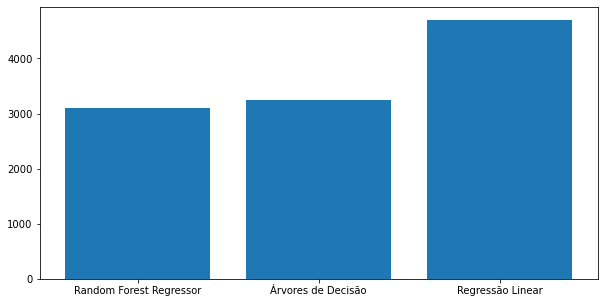

In [128]:
plt.figure(figsize=(10,5))
modelos = ['Random Forest Regressor','Árvores de Decisão','Regressão Linear']
rmse_results = [forest_rmse_scores.mean(),tree_rmse_scores.mean(),lin_rmse_scores.mean()]
plt.bar(modelos,rmse_results)
plt.show()

* O modelo que apresentou o melhor resultado foi o Random Forest Regressor, com uma média de 3104.25 e Desvio padrão de 10.12. 

* O modelo que apresentou o pior resultado foi Regressão Linear, com uma média de 4698.57.

## Ajustando o modelo

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [88]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3240.0368586654963 {'max_features': 2, 'n_estimators': 3}
3146.354782385478 {'max_features': 2, 'n_estimators': 10}
3113.8502373824194 {'max_features': 2, 'n_estimators': 30}
3195.147052745593 {'max_features': 4, 'n_estimators': 3}
3116.5286415303335 {'max_features': 4, 'n_estimators': 10}
3092.1908968214607 {'max_features': 4, 'n_estimators': 30}
3189.7194065643685 {'max_features': 6, 'n_estimators': 3}
3113.69593038091 {'max_features': 6, 'n_estimators': 10}
3090.7681177947175 {'max_features': 6, 'n_estimators': 30}
3190.8519135983893 {'max_features': 8, 'n_estimators': 3}
3113.550185792652 {'max_features': 8, 'n_estimators': 10}
3091.525807896673 {'max_features': 8, 'n_estimators': 30}
3234.9765027658 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3208.8785192126293 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3220.9734450693413 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3193.3137227549933 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [90]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.629461,0.132317,0.119012,0.017448,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.050610e+07,-1.044559e+07,...,-1.049784e+07,34908.602396,18,-6.893835e+06,-6.870003e+06,-6.860087e+06,-6.877834e+06,-6.829851e+06,-6.866322e+06,21316.968178
1,5.273632,0.390773,0.392229,0.033722,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-9.861214e+06,-9.882527e+06,...,-9.899548e+06,25471.543877,8,-6.454970e+06,-6.438918e+06,-6.441489e+06,-6.438186e+06,-6.422940e+06,-6.439301e+06,10192.051478
2,19.058816,1.963114,1.362018,0.224190,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9.669886e+06,-9.669815e+06,...,-9.696063e+06,22302.223665,6,-6.325215e+06,-6.307908e+06,-6.308889e+06,-6.305790e+06,-6.296687e+06,-6.308898e+06,9230.594168
3,2.448970,0.308115,0.116300,0.006370,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.017884e+07,-1.017264e+07,...,-1.020896e+07,39056.123255,13,-6.795727e+06,-6.774993e+06,-6.779353e+06,-6.787680e+06,-6.769849e+06,-6.781521e+06,9201.108472
4,7.528435,0.603233,0.390434,0.071013,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-9.659570e+06,-9.708552e+06,...,-9.712751e+06,38457.175518,7,-6.410785e+06,-6.394490e+06,-6.395064e+06,-6.396577e+06,-6.386922e+06,-6.396768e+06,7765.713263
5,24.323831,1.601757,1.147469,0.138064,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.518259e+06,-9.548200e+06,...,-9.561645e+06,33513.679527,3,-6.298719e+06,-6.284073e+06,-6.283883e+06,-6.283854e+06,-6.274790e+06,-6.285064e+06,7692.235199
6,4.197272,0.270039,0.138475,0.014813,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.015606e+07,-1.018157e+07,...,-1.017431e+07,30150.717548,9,-6.790710e+06,-6.766711e+06,-6.763796e+06,-6.769401e+06,-6.756301e+06,-6.769384e+06,11526.546034
7,11.646795,1.431021,0.360296,0.029480,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-9.657909e+06,-9.707717e+06,...,-9.695102e+06,27891.594431,5,-6.410204e+06,-6.392781e+06,-6.390645e+06,-6.390927e+06,-6.382196e+06,-6.393350e+06,9186.592373
8,29.532056,4.120085,1.196819,0.472886,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-9.515521e+06,-9.541462e+06,...,-9.552848e+06,30094.715293,1,-6.298800e+06,-6.284036e+06,-6.283412e+06,-6.282862e+06,-6.273800e+06,-6.284582e+06,8037.915009
9,6.040411,1.029088,0.202212,0.064195,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.015439e+07,-1.017298e+07,...,-1.018154e+07,22313.619486,10,-6.793848e+06,-6.775764e+06,-6.773698e+06,-6.772517e+06,-6.762612e+06,-6.775688e+06,10146.941202


* A melhor solução obtido foi definindo os seguintes hiperparâmetros: 3090.7681177947175 {'max_features': 6, 'n_estimators': 30}. A pontuação RMSE é um pouco melhor do que o resultado obtido anteriormente utilizando os valores padrão do hiperparâmetro (3104.246872324635). O modelo foi ajustado com sucesso.


### Analisando os melhores modelos e seus erros

In [91]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07479204, 0.03786733, 0.01252365, 0.74266751, 0.07942745,
       0.03638165, 0.00361939, 0.00380865, 0.00241203, 0.00235168,
       0.00414862])

In [92]:
extra_attribs = ['occupation_pc1', 'occupation_pc3', 'marital_pc1']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7426675077781029, 'Product_Category_1'),
 (0.07942745476556184, 'Product_Category_2'),
 (0.07479203970968261, 'Occupation'),
 (0.037867331203258324, 'Stay_In_Current_City_Years'),
 (0.03638164519151874, 'Product_Category_3'),
 (0.012523652931481518, 'Marital_Status'),
 (0.004148623402962749, 'M'),
 (0.0038086541193420556, 'occupation_pc3'),
 (0.003619385838549037, 'occupation_pc1'),
 (0.002412026228032563, 'marital_pc1'),
 (0.0023516788315077163, 'F')]

* Aparentemente, apenas a categoria 'Product_Category_1' é realmente útil.

### Avaliando o sistema de conjunto de testes

In [93]:
final_model = grid_search.best_estimator_

In [94]:
X_test = strat_test_set.drop('Purchase', axis=1)
y_test = strat_test_set['Purchase'].copy()

In [95]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [96]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [97]:
final_mse

9409267.118788516

In [98]:
final_rmse

3067.4528714861317

## Conclusão

* O RMSE final foi melhor do que quando medido com validação, sendo feitos poucos ajustes de hiperparâmetros. A tabela abaixo mostra a diferença.

In [144]:
resultados = {'Modelo': ['RMSE Final','RMSE Cross-Validation'],
         'Resultado': [final_rmse, forest_rmse_scores.mean()]    
        }

table = pd.DataFrame(resultados, columns=["Modelo","Resultado"])
table

,Modelo,Resultado
0,RMSE Final,3067.452871
1,RMSE Cross-Validation,3104.246872


*  O objetivo proposto era determinar qual o melhor modelo de regressão para este problema. O Random Forest Regressor final foi o modelo que apresentou os melhores resultados, em relação à Regressão Linear e Árvores de Decisão, com o menor RMSE entre todos.

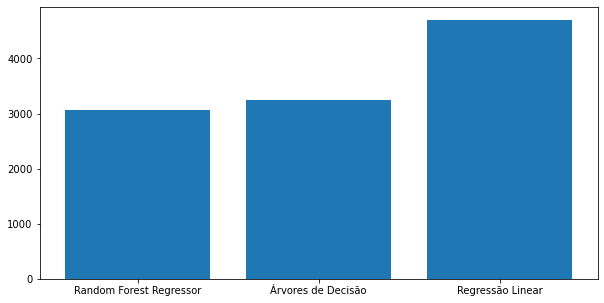

In [145]:
plt.figure(figsize=(10,5))
modelos = ['Random Forest Regressor','Árvores de Decisão','Regressão Linear']
rmse_results = [final_rmse,tree_rmse_scores.mean(),lin_rmse_scores.mean()]
plt.bar(modelos,rmse_results)
plt.show()